In [1]:
import numpy as np
import pandas as pd
!pip install openpyxl

In [2]:
UN = '/home/jovyan/UN_MigrantStockTotal_2015.xlsx'
#  read all the tables into pandas dataframes, 
#  row 14 & 15 as row names, for simplicity we use row 15 as header
#  and read the rest rows as data
dfs = pd.read_excel(UN, sheet_name=None, header=[15])

In [3]:
# sheets are sorted as a dictionary, where
#   keys are sheet names
#   values are data frames
dfs.keys()

dict_keys(['CONTENTS', 'Table 1', 'Table 2', 'Table 3', 'Table 4', 'Table 5', 'Table 6', 'ANNEX', 'NOTES'])

# Table 1: International Migrant Stock at Mid-Year 

In [4]:
table1 = dfs['Table 1']
table1.head() 

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,1990,1995,2000,2005,2010,...,2000.1,2005.1,2010.1,2015.1,1990.2,1995.2,2000.2,2005.2,2010.2,2015.2
0,1,WORLD,NaN,900,NaN,152563212,160801752,172703309,191269100,221714243,...,87884839,97866674,114613714,126115435,74815702,79064275,84818470,93402426,107100529,117584801
1,2,Developed regions,(b),901,NaN,82378628,92306854,103375363,117181109,132560325,...,50536796,57217777,64081077,67618619,42115231,47214055,52838567,59963332,68479248,72863336
2,3,Developing regions,(c),902,NaN,70184584,68494898,69327946,74087991,89153918,...,37348043,40648897,50532637,58496816,32700471,31850220,31979903,33439094,38621281,44721465
3,4,Least developed countries,(d),941,NaN,11075966,11711703,10077824,9809634,10018128,...,5361902,5383009,5462714,6463217,5236216,5573685,4721920,4432371,4560536,5493028
4,5,Less developed regions excluding least develop...,NaN,934,NaN,59105261,56778501,59244124,64272611,79130668,...,31986141,35265888,45069923,52033599,27464255,26276535,27257983,29006723,34060745,39228437


There are some columns without proper names, which need to be renamed for clarity.

In [5]:
table1 = table1.rename(columns = {'Unnamed: 0':"Order",
                                  'Unnamed: 1':"Destination",
                                  'Unnamed: 2':'Notes',
                                  'Unnamed: 3':'Country Code',
                                  'Unnamed: 4':'Data Type'})
# Drop some columns which are not useful for our table.
# Clean the table by replacing '..' values with NaN
table1 = (table1.
          drop(columns=['Notes','Data Type'],axis = 1).
          replace('..', np.nan))
table1.head()

,Order,Destination,Country Code,1990,1995,2000,2005,2010,2015,1990.1,...,2000.1,2005.1,2010.1,2015.1,1990.2,1995.2,2000.2,2005.2,2010.2,2015.2
0,1,WORLD,900,152563212.0,160801752.0,172703309.0,191269100.0,221714243,243700236,77747510.0,...,87884839.0,97866674.0,114613714,126115435,74815702.0,79064275.0,84818470.0,93402426.0,107100529,117584801
1,2,Developed regions,901,82378628.0,92306854.0,103375363.0,117181109.0,132560325,140481955,40263397.0,...,50536796.0,57217777.0,64081077,67618619,42115231.0,47214055.0,52838567.0,59963332.0,68479248,72863336
2,3,Developing regions,902,70184584.0,68494898.0,69327946.0,74087991.0,89153918,103218281,37484113.0,...,37348043.0,40648897.0,50532637,58496816,32700471.0,31850220.0,31979903.0,33439094.0,38621281,44721465
3,4,Least developed countries,941,11075966.0,11711703.0,10077824.0,9809634.0,10018128,11951316,5843107.0,...,5361902.0,5383009.0,5462714,6463217,5236216.0,5573685.0,4721920.0,4432371.0,4560536,5493028
4,5,Less developed regions excluding least develop...,934,59105261.0,56778501.0,59244124.0,64272611.0,79130668,91262036,31641006.0,...,31986141.0,35265888.0,45069923,52033599,27464255.0,26276535.0,27257983.0,29006723.0,34060745,39228437


We can find that the column names are year values but not variable names, that the variable is spread across columns.

**Thus, by tidy data principle 1, column headers should be names, no values. Thus we need to turn columns into rows.**

In [6]:
# Rename the columns for both sexes by adding .0 at the end of the year
table1 = table1.rename(columns = {1990:"1990.0",
                                  1995:"1995.0",
                                  2000:'2000.0',
                                  2005:'2005.0',
                                  2010:'2010.0',
                                  2015:'2015.0'})

# Using melt function to turn columns into one single varible 'Year', 
#   storing their values into a new column 'International migrant stock'
table1 = table1.melt(id_vars=["Order","Destination","Country Code"], 
                     var_name = "Year", value_name = "International Migrant Stock")
table1.head()

,Order,Destination,Country Code,Year,International Migrant Stock
0,1,WORLD,900,1990.0,152563212.0
1,2,Developed regions,901,1990.0,82378628.0
2,3,Developing regions,902,1990.0,70184584.0
3,4,Least developed countries,941,1990.0,11075966.0
4,5,Less developed regions excluding least develop...,934,1990.0,59105261.0


However, the Year column contains not only years but also gender that there are multiple variables stored in 1 column. 

**By tidy data principle 2: each column needs to consist of one and only one variable, thus we split 'Year' column into 'Year' and 'Gender'.**

In [7]:
# Create a new column Gender by obtaining the last digit of Year 
table1 = table1.assign(Gender = lambda x: x.Year.str[-1])
table1['Gender'] = table1['Gender'].apply(lambda x: "Male" if (x == "1") 
                                          else ("Both Sexes" if (x == "0") else "Female"))

# Modify Year by dropping the last digit
table1 =(table1.assign(Year = lambda x: x.Year.str[:-2].astype(str)))
table1.head()

,Order,Destination,Country Code,Year,International Migrant Stock,Gender
0,1,WORLD,900,1990,152563212.0,Both Sexes
1,2,Developed regions,901,1990,82378628.0,Both Sexes
2,3,Developing regions,902,1990,70184584.0,Both Sexes
3,4,Least developed countries,941,1990,11075966.0,Both Sexes
4,5,Less developed regions excluding least develop...,934,1990,59105261.0,Both Sexes


# tidy_table()

We can find the structures of tables are quite similar, which means we can define a function tidy_table to organize the steps of data cleaning and enable repeated use.

Tidy Steps:

    1. clean the table by replacing missing values to NaN 
    2. by princple 1, year-related columns to a single varible Year
    3. by princple 2, split 'Year' column into 'Year' and 'Gender' 

In [8]:
# function takes two variables: table t, and a name for the main values stored in this table
#    returns the tidy table, splitted major_area table, splitted countries table
def tidy_table(t, name): 
    t = (t.melt(id_vars=["Order","Destination","Country Code"],  # principle 1
                var_name = "Year", value_name = name).
         assign(Gender = lambda x: x.Year.str[-1]))            # principle 2
    
    # replace gender values to descriptive values
    t['Gender'] = t['Gender'].apply(lambda x: "Male" if (x == "1") 
                                          else ("Both Sexes" if (x == "0") else "Female"))
    t = (t.assign(Year = lambda x: x.Year.str[:-2].astype(str)))
    return t

# Table 2: Total Population by Sex at Mid-Year 

In [9]:
table2 = dfs['Table 2']
table2.head() 

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,1990,1995,2000,2005,2010,2015,...,2000.1,2005.1,2010.1,2015.1,1990.2,1995.2,2000.2,2005.2,2010.2,2015.2
0,1,WORLD,NaN,900,5309667.699,5735123.084,6126622.121,6519635.850,6929725.043,7349472.099,...,3084537.662,3285082.249,3493956.904,3707205.753,2639243.998,2848487.191,3042084.459,3234553.601,3435768.139,3642266.346
1,2,Developed regions,(b),901,1144463.062,1169761.211,1188811.731,1208919.509,1233375.711,1251351.086,...,578010.218,587962.213,599955.476,609297.148,589207.436,601492.755,610801.513,620957.296,633420.235,642053.938
2,3,Developing regions,(c),902,4165204.637,4565361.873,4937810.390,5310716.341,5696349.332,6098121.013,...,2506527.444,2697120.036,2894001.428,3097908.605,2050036.562,2246994.436,2431282.946,2613596.305,2802347.904,3000212.408
3,4,Least developed countries,(d),941,510057.629,585189.354,664386.087,752804.951,847254.847,954157.804,...,331482.475,375757.715,422397.532,476031.179,256015.073,293162.612,332903.612,377047.236,424857.315,478126.625
4,5,Less developed regions excluding least develop...,NaN,934,3655147.008,3980172.519,4273424.303,4557911.390,4849094.485,5143963.209,...,2175044.969,2321362.321,2471603.896,2621877.426,1794021.489,1953831.824,2098379.334,2236549.069,2377490.589,2522085.783


Same as what we did for table 1, here we need to prepare for cleaning by giving proper variable names for the table and dropping not useful columns 

In [10]:
# Rename columns, drop not useful columns
# replace '..' values with 0, which will be replaced back to NaN at the end
table2 = (table2.
          rename(columns = {'Unnamed: 0':"Order",
                            'Unnamed: 1':"Destination",
                            'Unnamed: 2':'Notes',
                            'Unnamed: 3':'Country Code',
                            1990:"1990.0", 1995:"1995.0", 2000:'2000.0',
                            2005:'2005.0', 2010:'2010.0', 2015:'2015.0'}).
          drop(columns=['Notes'],axis = 1).
         replace("..", np.nan))
table2.head()

,Order,Destination,Country Code,1990.0,1995.0,2000.0,2005.0,2010.0,2015.0,1990.1,...,2000.1,2005.1,2010.1,2015.1,1990.2,1995.2,2000.2,2005.2,2010.2,2015.2
0,1,WORLD,900,5309667.699,5735123.084,6126622.121,6519635.850,6929725.043,7349472.099,2670423.701,...,3084537.662,3285082.249,3493956.904,3707205.753,2639243.998,2848487.191,3042084.459,3234553.601,3435768.139,3642266.346
1,2,Developed regions,901,1144463.062,1169761.211,1188811.731,1208919.509,1233375.711,1251351.086,555255.626,...,578010.218,587962.213,599955.476,609297.148,589207.436,601492.755,610801.513,620957.296,633420.235,642053.938
2,3,Developing regions,902,4165204.637,4565361.873,4937810.390,5310716.341,5696349.332,6098121.013,2115168.075,...,2506527.444,2697120.036,2894001.428,3097908.605,2050036.562,2246994.436,2431282.946,2613596.305,2802347.904,3000212.408
3,4,Least developed countries,941,510057.629,585189.354,664386.087,752804.951,847254.847,954157.804,254042.556,...,331482.475,375757.715,422397.532,476031.179,256015.073,293162.612,332903.612,377047.236,424857.315,478126.625
4,5,Less developed regions excluding least develop...,934,3655147.008,3980172.519,4273424.303,4557911.390,4849094.485,5143963.209,1861125.519,...,2175044.969,2321362.321,2471603.896,2621877.426,1794021.489,1953831.824,2098379.334,2236549.069,2377490.589,2522085.783


In [11]:
table2 = tidy_table(table2,"Total Population (thousands)")  
table2

,Order,Destination,Country Code,Year,Total Population (thousands),Gender
0,1,WORLD,900,1990,5309667.699,Both Sexes
1,2,Developed regions,901,1990,1144463.062,Both Sexes
2,3,Developing regions,902,1990,4165204.637,Both Sexes
3,4,Least developed countries,941,1990,510057.629,Both Sexes
4,5,Less developed regions excluding least develop...,934,1990,3655147.008,Both Sexes
...,...,...,...,...,...,...
4765,261,Samoa,882,2015,93.584,Female
4766,262,Tokelau,772,2015,NaN,Female
4767,263,Tonga,776,2015,52.931,Female
4768,264,Tuvalu,798,2015,NaN,Female


# Table 3: International Migrant Stock as a Percentage of the Total Population

Table 3 stores the International migrant stock as a percentage of the total population. 

Recall that table 1 stores International migrant stock at mid-year; table 2 stores Total population at mid-year (thousands).

**We can find that values in table 3 can be derived by table1/table2**.

And values in three tables are all organized by the same index sets: 'Order','destination','Country Code', which means there are many redundant valeus stored in those three tables. 

**By principle 5, a single observational units must be in 1 table, thus we need to combine these three tables.**

In [12]:
# Combine Table 1 and Table 2  
joined_table = table1.copy()
joined_table = joined_table.merge(table2, on=["Order","Destination","Country Code","Year","Gender"])
joined_table.head()

,Order,Destination,Country Code,Year,International Migrant Stock,Gender,Total Population (thousands)
0,1,WORLD,900,1990,152563212.0,Both Sexes,5309667.699
1,2,Developed regions,901,1990,82378628.0,Both Sexes,1144463.062
2,3,Developing regions,902,1990,70184584.0,Both Sexes,4165204.637
3,4,Least developed countries,941,1990,11075966.0,Both Sexes,510057.629
4,5,Less developed regions excluding least develop...,934,1990,59105261.0,Both Sexes,3655147.008


In [13]:
# Add values in table 3 into the joined table, which can be derived by:
#    100*International migrant stock/(Population*1000)
joined_table["Migrant Percentage of Population"] = 100*joined_table["International Migrant Stock"]/(joined_table["Total Population (thousands)"]*1000)
joined_table.head()

,Order,Destination,Country Code,Year,International Migrant Stock,Gender,Total Population (thousands),Migrant Percentage of Population
0,1,WORLD,900,1990,152563212.0,Both Sexes,5309667.699,2.873310
1,2,Developed regions,901,1990,82378628.0,Both Sexes,1144463.062,7.198015
2,3,Developing regions,902,1990,70184584.0,Both Sexes,4165204.637,1.685021
3,4,Least developed countries,941,1990,11075966.0,Both Sexes,510057.629,2.171513
4,5,Less developed regions excluding least develop...,934,1990,59105261.0,Both Sexes,3655147.008,1.617042


Moreover, major areas and regions have country code greater or equal to 900, and each individual country has code less than 900. 

**According to principle 4: to make sure we have singular data type in one column/table, we need to split them into two tables.**

Before splitting, we can add one more column to store the region of each country.

In [14]:
# add a new column region for each country to the table
def region_col(table):
    region = []
    major_areas = []     # to store all unique major_areas
    for i in range(len(table)):
        if table.iloc[i,]["Country Code"] >= 900:
            major_areas.append(table.iloc[i,]["Destination"])  # store the major area 
        region.append(major_areas[-1])  # current country's region is the last value in the region list 
    table["Region"] = region 
    return table

joined_table = region_col(joined_table) 
joined_table.head()

,Order,Destination,Country Code,Year,International Migrant Stock,Gender,Total Population (thousands),Migrant Percentage of Population,Region
0,1,WORLD,900,1990,152563212.0,Both Sexes,5309667.699,2.873310,WORLD
1,2,Developed regions,901,1990,82378628.0,Both Sexes,1144463.062,7.198015,Developed regions
2,3,Developing regions,902,1990,70184584.0,Both Sexes,4165204.637,1.685021,Developing regions
3,4,Least developed countries,941,1990,11075966.0,Both Sexes,510057.629,2.171513,Least developed countries
4,5,Less developed regions excluding least develop...,934,1990,59105261.0,Both Sexes,3655147.008,1.617042,Less developed regions excluding least develop...


In [15]:
# reorder columns
joined_table = joined_table[["Order","Destination","Region","Country Code","Year","Gender",
                             "International Migrant Stock","Total Population (thousands)","Migrant Percentage of Population"]]
joined_table.head()

,Order,Destination,Region,Country Code,Year,Gender,International Migrant Stock,Total Population (thousands),Migrant Percentage of Population
0,1,WORLD,WORLD,900,1990,Both Sexes,152563212.0,5309667.699,2.873310
1,2,Developed regions,Developed regions,901,1990,Both Sexes,82378628.0,1144463.062,7.198015
2,3,Developing regions,Developing regions,902,1990,Both Sexes,70184584.0,4165204.637,1.685021
3,4,Least developed countries,Least developed countries,941,1990,Both Sexes,11075966.0,510057.629,2.171513
4,5,Less developed regions excluding least develop...,Less developed regions excluding least develop...,934,1990,Both Sexes,59105261.0,3655147.008,1.617042


In [16]:
# Split the joined table to "major_area" and "countries"
major_area = joined_table[(joined_table['Country Code'] >= 900)]
countries = joined_table[(joined_table['Country Code'] < 900)] 

In [17]:
major_area.head()

,Order,Destination,Region,Country Code,Year,Gender,International Migrant Stock,Total Population (thousands),Migrant Percentage of Population
0,1,WORLD,WORLD,900,1990,Both Sexes,152563212.0,5309667.699,2.873310
1,2,Developed regions,Developed regions,901,1990,Both Sexes,82378628.0,1144463.062,7.198015
2,3,Developing regions,Developing regions,902,1990,Both Sexes,70184584.0,4165204.637,1.685021
3,4,Least developed countries,Least developed countries,941,1990,Both Sexes,11075966.0,510057.629,2.171513
4,5,Less developed regions excluding least develop...,Less developed regions excluding least develop...,934,1990,Both Sexes,59105261.0,3655147.008,1.617042


We find the distination column is exactly the same as region column, thus we can drop the region column here.

In [18]:
# Reset index and drop column 'data type'
tidy_major_area = (major_area.
              reset_index().
              drop(columns=['Region',"index"],axis = 1))
tidy_major_area.sort_values(["Order","Year"])

,Order,Destination,Country Code,Year,Gender,International Migrant Stock,Total Population (thousands),Migrant Percentage of Population
0,1,WORLD,900,1990,Both Sexes,152563212.0,5309667.699,2.873310
198,1,WORLD,900,1990,Male,77747510.0,2670423.701,2.911430
396,1,WORLD,900,1990,Female,74815702.0,2639243.998,2.834740
33,1,WORLD,900,1995,Both Sexes,160801752.0,5735123.084,2.803806
231,1,WORLD,900,1995,Male,81737477.0,2886635.893,2.831583
...,...,...,...,...,...,...,...,...
362,256,Polynesia,957,2010,Male,39338.0,336.596,11.687008
560,256,Polynesia,957,2010,Female,33674.0,323.513,10.408855
197,256,Polynesia,957,2015,Both Sexes,72120.0,684.460,10.536774
395,256,Polynesia,957,2015,Male,38759.0,348.345,11.126613


In [19]:
tidy_major_area.head()

,Order,Destination,Country Code,Year,Gender,International Migrant Stock,Total Population (thousands),Migrant Percentage of Population
0,1,WORLD,900,1990,Both Sexes,152563212.0,5309667.699,2.873310
1,2,Developed regions,901,1990,Both Sexes,82378628.0,1144463.062,7.198015
2,3,Developing regions,902,1990,Both Sexes,70184584.0,4165204.637,1.685021
3,4,Least developed countries,941,1990,Both Sexes,11075966.0,510057.629,2.171513
4,5,Less developed regions excluding least develop...,934,1990,Both Sexes,59105261.0,3655147.008,1.617042


In [20]:
# Reset index
tidy_countries = (countries.  
              reset_index().
              drop(columns=['index'],axis = 1))
tidy_countries.sort_values(["Order","Year"]) 

,Order,Destination,Region,Country Code,Year,Gender,International Migrant Stock,Total Population (thousands),Migrant Percentage of Population
0,9,Burundi,Eastern Africa,108,1990,Both Sexes,333110.0,5613.141,5.934467
1392,9,Burundi,Eastern Africa,108,1990,Male,163267.0,2755.028,5.926147
2784,9,Burundi,Eastern Africa,108,1990,Female,169843.0,2858.113,5.942487
232,9,Burundi,Eastern Africa,108,1995,Both Sexes,254853.0,6239.030,4.084818
1624,9,Burundi,Eastern Africa,108,1995,Male,124165.0,3054.367,4.065163
...,...,...,...,...,...,...,...,...,...
2551,265,Wallis and Futuna Islands,Polynesia,876,2010,Male,1401.0,NaN,NaN
3943,265,Wallis and Futuna Islands,Polynesia,876,2010,Female,1375.0,NaN,NaN
1391,265,Wallis and Futuna Islands,Polynesia,876,2015,Both Sexes,2849.0,13.151,21.663752
2783,265,Wallis and Futuna Islands,Polynesia,876,2015,Male,1438.0,NaN,NaN


# Table 4: Female migrants as a percentage of the international migrant stock

In [21]:
table4 = dfs['Table 4'] 
# Prepare for cleaning by giving proper variable names for the table and dropping not useful columns
table4 = (table4.
          rename(columns = {'Unnamed: 0':"Order",
                            'Unnamed: 1':"Destination",
                            'Unnamed: 2':'Notes',
                            'Unnamed: 3':'Country Code',
                            'Unnamed: 4':'Data Type',
                            1990:"1990.2", 1995:"1995.2", 2000:'2000.2',
                            2005:'2005.2', 2010:'2010.2', 2015:'2015.2'}).
          drop(columns=['Notes','Data Type'],axis = 1))

# Conduct data cleaning for table 4
table4 = tidy_table(table4,"Female Migrants Percentage") 
table4 = table4.drop(columns = ["Gender"])
table4

,Order,Destination,Country Code,Year,Female Migrants Percentage
0,1,WORLD,900,1990,49.03915
1,2,Developed regions,901,1990,51.123977
2,3,Developing regions,902,1990,46.592099
3,4,Least developed countries,941,1990,47.261155
4,5,Less developed regions excluding least develop...,934,1990,46.466684
...,...,...,...,...,...
1585,261,Samoa,882,2015,49.908704
1586,262,Tokelau,772,2015,52.156057
1587,263,Tonga,776,2015,45.437096
1588,264,Tuvalu,798,2015,44.680851


# Table 5: Annual Rate of Change of the Migrant Stock by Sex

In [22]:
table5 = dfs['Table 5'] 
# Prepare for cleaning by giving proper variable names for the table and dropping not useful columns
table5 = (table5.
          rename(columns = {'Unnamed: 0':"Order",
                            'Unnamed: 1':"Destination",
                            'Unnamed: 2':'Notes',
                            'Unnamed: 3':'Country Code',
                            'Unnamed: 4':'Data Type',
                            '1990-1995':"1990-1995.0", '1995-2000':"1995-2000.0", '2000-2005':'2000-2005.0',
                            '2005-2010':'2005-2010.0', '2010-2015':'2010-2015.0'}).
          drop(columns=['Notes','Data Type'],axis = 1))

# Conduct data cleaning for table 5
table5 = tidy_table(table5,"Annual Rate of Change of The Migrant Stock")  
table5

,Order,Destination,Country Code,Year,Annual Rate of Change of The Migrant Stock,Gender
0,1,WORLD,900,1990-1995,1.051865,Both Sexes
1,2,Developed regions,901,1990-1995,2.275847,Both Sexes
2,3,Developing regions,902,1990-1995,-0.487389,Both Sexes
3,4,Least developed countries,941,1990-1995,1.118175,Both Sexes
4,5,Less developed regions excluding least develop...,934,1990-1995,-0.803244,Both Sexes
...,...,...,...,...,...,...
3970,261,Samoa,882,2010-2015,-0.545343,Female
3971,262,Tokelau,772,2010-2015,2.60325,Female
3972,263,Tonga,776,2010-2015,2.526318,Female
3973,264,Tuvalu,798,2010-2015,-1.819436,Female


Since each country/region's annual rate of change has three categories 'Both sexes', 'Male' and 'Female'. For clarity, we can also convert the gender column into three individual columns by principle 3.

In [23]:
table5 = (table5.
          replace('..', -1).   # prepare for using pivot table which cannot contain NaN
          pivot_table(index = ["Order","Destination","Country Code","Year"],  # principle 3
                      columns = "Gender",
                      values = "Annual Rate of Change of The Migrant Stock").
                reset_index().
                rename_axis(None, axis=1).
          replace(-1, np.nan)) # change missing values back to NaN
table5

,Order,Destination,Country Code,Year,Both Sexes,Female,Male
0,1,WORLD,900,1990-1995,1.051865,1.104667,1.000922
1,1,WORLD,900,1995-2000,1.428058,1.405044,1.450294
2,1,WORLD,900,2000-2005,2.042124,1.928080,2.151575
3,1,WORLD,900,2005-2010,2.954160,2.737012,3.159228
4,1,WORLD,900,2010-2015,1.890991,1.867837,1.912603
...,...,...,...,...,...,...,...
1320,265,Wallis and Futuna Islands,876,1990-1995,3.617880,3.886601,3.364378
1321,265,Wallis and Futuna Islands,876,1995-2000,3.636508,3.884553,3.396526
1322,265,Wallis and Futuna Islands,876,2000-2005,3.203177,3.217252,3.189382
1323,265,Wallis and Futuna Islands,876,2005-2010,3.204660,3.211913,3.197545


# Table 6: Estimated Refugee Stock at Mid-Year

In [24]:
table6 = dfs['Table 6'] 
# Rename columns, drop not useful columns
# replace '..' values with NaN 
table6 = (table6.
          rename(columns = {'Unnamed: 0':"Order",
                            'Unnamed: 1':"Destination",
                            'Unnamed: 2':'Notes',
                            'Unnamed: 3':'Country Code',
                            'Unnamed: 4':"Data Type",
                            1990:"1990.0", 1995:"1995.0", 2000:'2000.0',
                            2005:'2005.0', 2010:'2010.0', 2015:'2015.0'}).
          drop(columns=['Notes', 'Data Type'],axis = 1).
          replace("..",np.nan))
table6.head()

,Order,Destination,Country Code,1990.0,1995.0,2000.0,2005.0,2010.0,2015.0,1990.1,1995.1,2000.1,2005.1,2010.1,2015.1,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015
0,1,WORLD,900,18836571.0,17853840.0,15827803.0,13276733.0,15370755,19577474,12.346732,11.103013,9.164736,6.941389,6.932687,8.033424,-2.123497,-3.837069,-5.557223,-0.025089,2.947267
1,2,Developed regions,901,2014564.0,3609670.0,2997256.0,2361229.0,2046917,1954224,2.445494,3.910511,2.899391,2.015025,1.544140,1.391085,9.388424,-5.983348,-7.277379,-5.323293,-2.087656
2,3,Developing regions,902,16822007.0,14244170.0,12830547.0,10915504.0,13323838,17623250,23.968236,20.795958,18.507035,14.733162,14.944759,17.073768,-2.839417,-2.332154,-4.561000,0.285195,2.663652
3,4,Least developed countries,941,5048391.0,5160131.0,3047488.0,2363782.0,1957884,3443582,45.565880,44.041961,30.221557,24.082430,19.533425,28.801534,-0.680327,-7.531747,-4.541459,-4.187109,7.766031
4,5,Less developed regions excluding least develop...,934,11773616.0,9084039.0,9783059.0,8551722.0,11365954,14179668,19.919743,15.999082,16.513130,13.305391,14.363526,15.537313,-4.383600,0.632489,-4.319731,1.530456,1.571047


Table 6 is slightly different from the previous tables, which contains multiple type of data. 

Column '1990.0' to '2015.0' represents Estimated refugee stock at mid-year (both sexes).

Column '1990.1' to '2015.1' represents Refugees as a percentage of the international migrant stock.

Column '1990-1995' to '2010-2015' represents Annual rate of change of the refugee stock.

**Thus, by principle 4, we need to split it into several tables** and cannot directly use the tidy function defined before. 

In [25]:
# set index and split tables
table6 = table6.set_index(["Order","Destination","Country Code"])
refugee_stock = table6[['1990.0', '1995.0', '2000.0', '2005.0', '2010.0', '2015.0']].copy()
Refugees_percentage = table6[['1990.1', '1995.1', '2000.1', '2005.1', '2010.1', '2015.1']].copy()
rate_of_change = table6[['1990-1995', '1995-2000', '2000-2005', '2005-2010', '2010-2015']].copy()

In [26]:
refugee_stock = (refugee_stock.reset_index().
                 melt(id_vars=["Order","Destination","Country Code"],  # principle 1
                      var_name = "Year", value_name = "Refugee Stock").
                 assign(Year = lambda x: x.Year.str[:-2].astype(str)))
refugee_stock

,Order,Destination,Country Code,Year,Refugee Stock
0,1,WORLD,900,1990,18836571.0
1,2,Developed regions,901,1990,2014564.0
2,3,Developing regions,902,1990,16822007.0
3,4,Least developed countries,941,1990,5048391.0
4,5,Less developed regions excluding least develop...,934,1990,11773616.0
...,...,...,...,...,...
1585,261,Samoa,882,2015,0.0
1586,262,Tokelau,772,2015,0.0
1587,263,Tonga,776,2015,0.0
1588,264,Tuvalu,798,2015,0.0


In [27]:
Refugees_percentage = (Refugees_percentage.reset_index().
                       melt(id_vars=["Order","Destination","Country Code"],  # principle 1
                       var_name = "Year", value_name = "Refugee Percentage").
                       assign(Year = lambda x: x.Year.str[:-2].astype(str)))
Refugees_percentage

,Order,Destination,Country Code,Year,Refugee Percentage
0,1,WORLD,900,1990,12.346732
1,2,Developed regions,901,1990,2.445494
2,3,Developing regions,902,1990,23.968236
3,4,Least developed countries,941,1990,45.565880
4,5,Less developed regions excluding least develop...,934,1990,19.919743
...,...,...,...,...,...
1585,261,Samoa,882,2015,0.000000
1586,262,Tokelau,772,2015,0.000000
1587,263,Tonga,776,2015,0.000000
1588,264,Tuvalu,798,2015,0.000000


In [28]:
rate_of_change = (rate_of_change.reset_index().
                       melt(id_vars=["Order","Destination","Country Code"],  # principle 1
                       var_name = "Year", value_name = "Rate of Change"))
rate_of_change

,Order,Destination,Country Code,Year,Rate of Change
0,1,WORLD,900,1990-1995,-2.123497
1,2,Developed regions,901,1990-1995,9.388424
2,3,Developing regions,902,1990-1995,-2.839417
3,4,Least developed countries,941,1990-1995,-0.680327
4,5,Less developed regions excluding least develop...,934,1990-1995,-4.383600
...,...,...,...,...,...
1320,261,Samoa,882,2010-2015,NaN
1321,262,Tokelau,772,2010-2015,NaN
1322,263,Tonga,776,2010-2015,NaN
1323,264,Tuvalu,798,2010-2015,NaN


We can find that the Refugees_percentage tables shares some values with the table 4 (Female migrants as a percentage of the international migrant stock), therefore we can also join this table with table4.

In [29]:
table4 = table4.merge(Refugees_percentage, on=["Order","Destination","Country Code","Year"])
table4

,Order,Destination,Country Code,Year,Female Migrants Percentage,Refugee Percentage
0,1,WORLD,900,1990,49.03915,12.346732
1,2,Developed regions,901,1990,51.123977,2.445494
2,3,Developing regions,902,1990,46.592099,23.968236
3,4,Least developed countries,941,1990,47.261155,45.565880
4,5,Less developed regions excluding least develop...,934,1990,46.466684,19.919743
...,...,...,...,...,...,...
1585,261,Samoa,882,2015,49.908704,0.000000
1586,262,Tokelau,772,2015,52.156057,0.000000
1587,263,Tonga,776,2015,45.437096,0.000000
1588,264,Tuvalu,798,2015,44.680851,0.000000


Similarly, the rate_of_change table also shares some commons with table 5 (Annual Rate of Change of the Migrant Stock by Sex). Thus we can join these two tables into one single table.

In [30]:
table5 = table5.merge(rate_of_change, on=["Order","Destination","Country Code","Year"])
table5 = table5.rename(columns = {'Rate of Change':"Refugees"})
table5

,Order,Destination,Country Code,Year,Both Sexes,Female,Male,Refugees
0,1,WORLD,900,1990-1995,1.051865,1.104667,1.000922,-2.123497
1,1,WORLD,900,1995-2000,1.428058,1.405044,1.450294,-3.837069
2,1,WORLD,900,2000-2005,2.042124,1.928080,2.151575,-5.557223
3,1,WORLD,900,2005-2010,2.954160,2.737012,3.159228,-0.025089
4,1,WORLD,900,2010-2015,1.890991,1.867837,1.912603,2.947267
...,...,...,...,...,...,...,...,...
1320,265,Wallis and Futuna Islands,876,1990-1995,3.617880,3.886601,3.364378,NaN
1321,265,Wallis and Futuna Islands,876,1995-2000,3.636508,3.884553,3.396526,NaN
1322,265,Wallis and Futuna Islands,876,2000-2005,3.203177,3.217252,3.189382,NaN
1323,265,Wallis and Futuna Islands,876,2005-2010,3.204660,3.211913,3.197545,NaN


In [31]:
table6 = refugee_stock
table6.head()

,Order,Destination,Country Code,Year,Refugee Stock
0,1,WORLD,900,1990,18836571.0
1,2,Developed regions,901,1990,2014564.0
2,3,Developing regions,902,1990,16822007.0
3,4,Least developed countries,941,1990,5048391.0
4,5,Less developed regions excluding least develop...,934,1990,11773616.0


# Summary & Export

We have cleaned the orginal 6 tables into the following tables:

In [ ]:
joined_table.sort_values(["Order","Year"])

In [ ]:
table4.sort_values(["Order","Year"])

In [ ]:
table5.sort_values(["Order","Year"])

In [ ]:
table6.head()

In [ ]:
# with pd.ExcelWriter('~/Desktop/tidy_tables.xlsx') as writer:  
#     joined_table.to_excel(writer, sheet_name='Migrant Stock and Population')
#     table4.to_excel(writer, sheet_name='Female and Refugee Percentage')
#     table5.to_excel(writer, sheet_name='Annual Rate of Change')
#     table6.to_excel(writer, sheet_name='Estimate Refugee Stock')
# writer.save()

# Final 

In [35]:
from datascience import *
import matplotlib
import matplotlib.pyplot as plt
#matplotlib.use('Agg', warn=False)
%matplotlib inline 
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import seaborn as sns
import plotly.express as px

# Visualizations for Joined_Table 

Recall that the joined_table contains the data of International migrant stock, Total population, International migrant stock as a percentage of the total population, at mid-year by sex and by destination, which is the combination of Table1, Table2, and Table 3

In [ ]:
joined_table.head()

Variables/Features:

* Year: 1990, 1995, 2000, 2005, 2010, 2015
* Gender: Both Sexes, Female, Male
* Destinations: Main regions, individual countries
* Data: International Migrant Stock, Total Population, Percentage of the two


Let's first take a look at the worldwide overall data and trends

In [ ]:
# get the world data and split into two dataframes, one for bothsexes, and another for male and female
worldB = joined_table.loc[(joined_table['Destination'] == 'WORLD') & (joined_table['Gender'] == 'Both Sexes')]
# add a new column for population with unit tens instead of thousands
worldB["Population (tens)"] = worldB['Total Population (thousands)'] * 100 
worldFM = joined_table.loc[(joined_table['Destination'] == 'WORLD') & (joined_table['Gender'] != 'Both Sexes')]

## Lineplot1: Worldwide International Migrant Stock as a Percentage of The Total Population

In [ ]:
# line plot for worldwide international migrant stock as a percentage
year = [1990,1995,2000,2005,2010,2015] 
percentageB = worldB['Migrant Percentage of Population'] 
plt.plot(year, percentageB, 'b-', 
         linewidth=2) 
plt.title("World International Migrant as a Percentage of Population (Both Sexes)",fontsize=12) 
plt.show()

## Barplot 1: Worldwide International Migrant Stock and Total Population by Year

In [ ]:
sns.set(font_scale=1)
# generate a bar plot, which overlapped the total population iwth the migrant stock
sns.set_context('paper')
f, ax = plt.subplots()
sns.set_color_codes('pastel')
sns.barplot(x = 'Year', y = 'Population (tens)', data = worldB,
            label = 'Total Population (tens)', color = 'b', edgecolor = 'w')
sns.set_color_codes('muted')
sns.barplot(x = 'Year', y = 'International Migrant Stock', data = worldB,
            label = 'Migrant Stock', color = 'b', edgecolor = 'w')
ax.legend(ncol = 2, loc = 'lower right')
sns.despine(left = True, bottom = True)
plt.title("World International Migrant and Total Population (Both Sexes)",fontsize=12) 
plt.show()

Let's now zoom in to see more details between continents. 

In [ ]:
# pull out the data for continent
continents1 = joined_table.loc[(joined_table['Destination'] == "Africa")|
                               (joined_table['Destination'] == "Asia")|
                               (joined_table['Destination'] == "Europe")|
                               (joined_table['Destination'] == "Latin America and the Caribbean")|
                               (joined_table['Destination'] == "Northern America") |
                               (joined_table['Destination'] == "Oceania")]

# add a new column for population with unit tens instead of thousands
continents1['Total Population'] = continents1['Total Population (thousands)'] * 1000
continents1_BS = continents1.loc[tidy_major_area2['Gender'] == 'Both Sexes']

# group by the desitination, and then calculate the mean value across years on Migrant and Pop
group = continents1_BS.groupby(['Destination'])
group = group[['International Migrant Stock','Total Population','Migrant Percentage of Population']].agg('mean') 
# reset index
grouped = group.reset_index()  

## Barplot 2: Worldwide International Migrant Stock and Total Population by Continent

In [ ]:
# transfer the data frame into a datascience Table
continent_Table = Table() 
continent_Table = continent_Table.with_columns("Continent", grouped["Destination"], 
                                               "Total Population", grouped["Total Population"],
                                               "International Migrant Stock", grouped["International Migrant Stock"])
continent_Table = continent_Table.sort('Total Population',descending=True)
# create a horizontal bar plot
continent_Table.barh('Continent')

## Lineplot2: World International Migrant Stock as a Percentage of Total Population by Sex

In [ ]:
# plot a line plot to compare Migrant Percentage of Population by sex
year = [1990,1995,2000,2005,2010,2015] 
# obtain worldwide female migrant percentage and male percentage
percentageF = worldFM.loc[worldFM['Gender'] == 'Male']['Migrant Percentage of Population']
percentageM = worldFM.loc[worldFM['Gender'] == 'Female']['Migrant Percentage of Population'] 
# obtain worldwide female migrant stock and male migrant stock
stockF = worldFM.loc[worldFM['Gender'] == 'Male']['International Migrant Stock']
stockM = worldFM.loc[worldFM['Gender'] == 'Female']['International Migrant Stock'] 

fig, axes = plt.subplots(1,2, figsize=(10, 3)) # two columns and one row
# two lineplots side by side
axes[0].plot(year, stockF, 'b-', 
         year, stockM, 'r-',
         linewidth=1)
axes[1].plot(year, percentageF, 'b-', 
         year, percentageM, 'r-',
         linewidth=1)
axes[0].legend(['Male','Female'],fontsize=10)
axes[0].set_title("World International Migrant Stock by Sex",fontsize=10)  
axes[1].legend(['Male','Female'],fontsize=10)
axes[1].set_title("World International Migrant as a Percentage of Population by Sex",fontsize=10)  
plt.rc('xtick', labelsize=8) 
plt.rc('ytick', labelsize=6) 

Now let's check more details by destinations' country developing status.

## Barplot3: Average International Migrant Stock by Destination Developing Status and by Sex

In [ ]:
sns.set(font_scale=1)
# plot a bar plot with values calculated by mean cross years.
develop_status = joined_table.loc[(joined_table['Destination'] == 'Developed regions') |
                              (joined_table['Destination'] == 'Developing regions') |
                              (joined_table['Destination'] == 'Least developed countries') |
                              (joined_table['Destination'] == 'Less developed regions excluding least developed countries')]
sns.catplot(y = "Destination", x="International Migrant Stock", hue="Gender", 
            data=develop_status, kind="bar",height=7,ci = None,aspect = 2)
plt.title("International Migrant by region developing status and by Sexes",fontsize=16,fontweight="bold")
plt.rc('xtick', labelsize=8) 
plt.rc('ytick', labelsize=8)

## Barplot4: World International Migrant Stock by Destination State, Year, and Sex

In [ ]:
# futherly compare between developing regions and developed regions by year and sex
developed_developing = develop_status.loc[(joined_table['Destination'] == 'Developed regions') |
                              (joined_table['Destination'] == 'Developing regions')]
sns.set(font_scale=3)
# Plot each year's bar plot
g = sns.catplot(x = "Destination", y = "International Migrant Stock", 
            col = "Year", hue="Gender", 
            data=developed_developing, kind="bar",height=7,
            col_wrap=3, ci = None, legend=False, aspect=1.8) 

for year, ax in g.axes_dict.items():  
    # add legend to each plot
    ax.legend(loc='upper center', fontsize=26)
g.set_axis_labels("", "Migrant")
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Barplot for International Migrant Stock by Year and Sex')

## Lineplot 3: World International Migrant Stock by Continent, Year, and Sex

In [ ]:
sns.set(font_scale=1)
g = sns.relplot(
    data=continents1,
    x="Year", y="International Migrant Stock", col="Destination",hue="Gender",
    kind="line", linewidth=3, zorder=5,
    col_wrap=3, height=4, legend=True, aspect=1) 
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('International Migrant Stock by Continent and Sex')
g.set_axis_labels("", "Migrant") 

In [36]:
# add a new column continent for each country to the table
def continent_col(table):
    region = []
    continent = ["Others","Africa", "Asia", "Europe", "Latin America and the Caribbean", "Northern America","Oceania"] 
    ind = 0
    for i in range(len(table)):
        if table.iloc[i,]["Destination"] in continent:
            ind = continent.index(table.iloc[i,]["Destination"]) # update index
        region.append(continent[ind])  # store current country's continent  
    table["Continent"] = region 
    return table 

## Boxplot 1: World International Migrant Stock by Continent, Year, and Sex

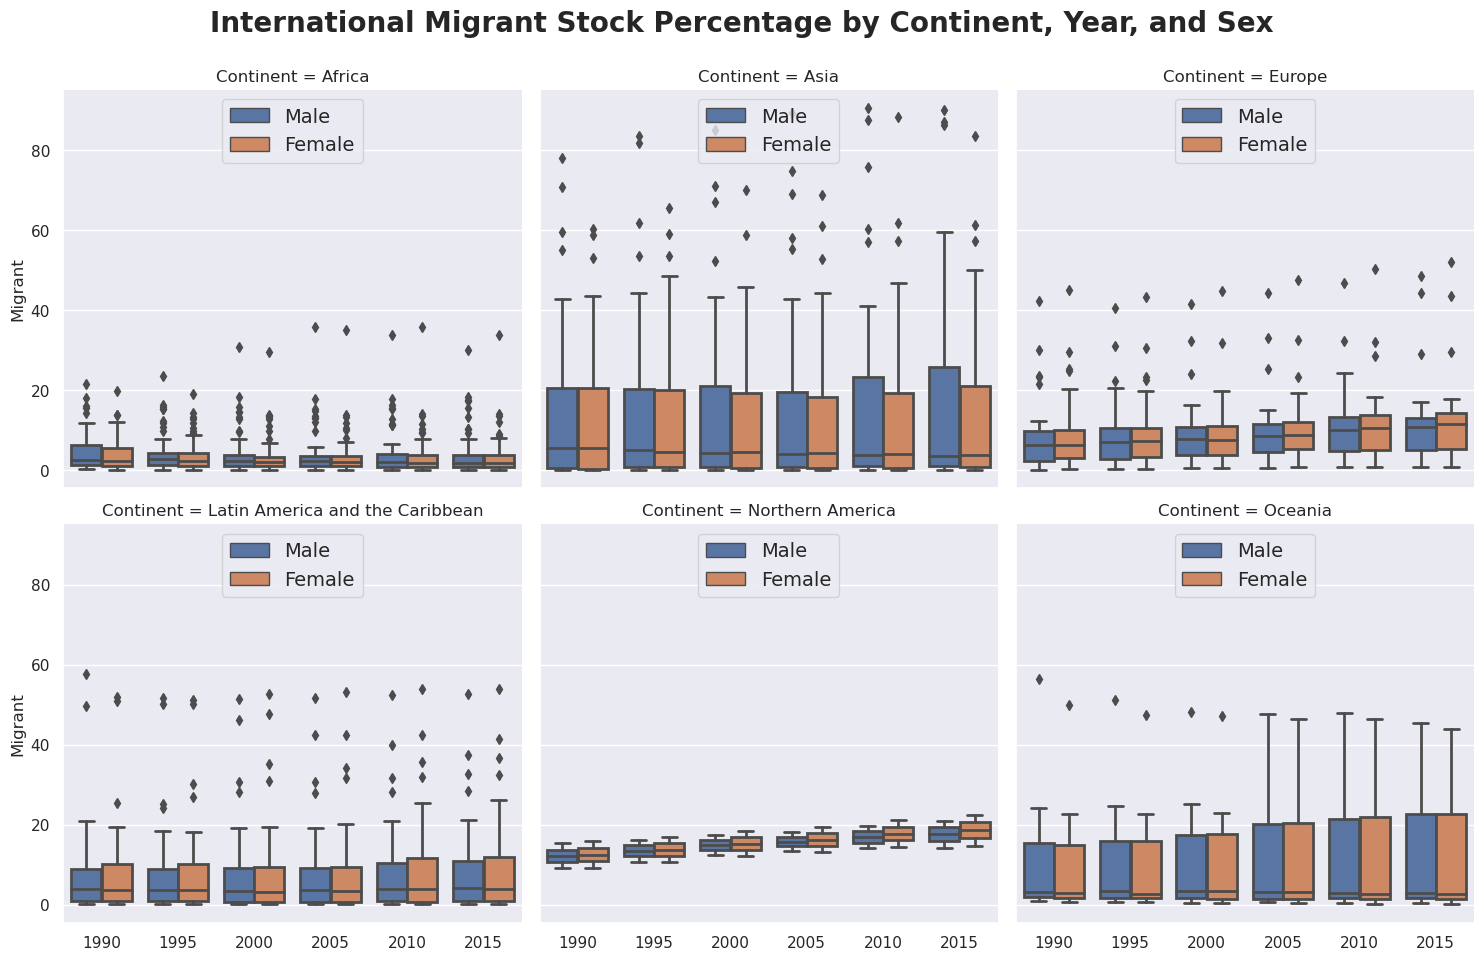

In [51]:
# add a continent column to the joined_table
joined_table2 = continent_col(joined_table)
# obtain only individual countries and rows for both sexes
joined_countries = joined_table2[(joined_table2['Country Code'] < 900)] 
joined_countries = joined_countries.drop(joined_countries[joined_countries['Continent'] == 'Others'].index)
joined_countries = joined_countries.drop(joined_countries[joined_countries['Gender'] == 'Both Sexes'].index)

sns.set(font_scale=1)
# plot a group of boxplots for each continent 
g = sns.catplot(
    data=joined_countries,
    x="Year", y="Migrant Percentage of Population", col="Continent",hue="Gender",
    kind="box", linewidth=2, zorder=5,
    col_wrap=3, height=5, legend=False, aspect=1) 
for year, ax in g.axes_dict.items():  
    # add legend to each plot
    ax.legend(loc='upper center', fontsize=14)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('International Migrant Stock Percentage by Continent, Year, and Sex',fontweight="bold", fontsize=20)
g.set_axis_labels("", "Migrant") 

Because of the outliers in boxplot for Northern America, it's hard to capture distribution details in other continents. Hence, we can compare them within smaller groups.

## Boxplot 2: International Migrant Stock in Northern America by Year and Gender

In [54]:
# split into two groups: Northern_America and Asia & Europe
Northern_America = joined_countries[(joined_countries['Continent'] == 'Northern America')]
Asia_Europe_Oceania = joined_countries[(joined_countries['Continent'] == 'Asia')|
                               (joined_countries['Continent'] == 'Europe')|
                                      (joined_countries['Continent'] == 'Oceania')]

# Boxplot for Northern_America
fig = px.box(Northern_America, x="Year", y="Migrant Percentage of Population", color="Gender",
            hover_data=["Destination"]) # add Destination column to hover data
fig.update_layout(title_text="International Migrant Stock Percentegae in Northern America by Year and Gender")
fig.show()

In [55]:
# Boxplot for Northern_America
fig = px.box(Northern_America, x="Year", y="International Migrant Stock", color="Gender",
            hover_data=["Destination"]) # add Destination column to hover data
fig.update_layout(title_text="International Migrant Stock in Northern America by Year and Gender")
fig.show()

## Boxplot 3: International Migrant Stock in Asia and Europe by Gender

In [56]:
# Asia & Europe
fig = px.box(Asia_Europe_Oceania, x="Migrant Percentage of Population", y="Year", color="Gender",facet_row = 'Continent',
            hover_data=["Destination"]) # add Destination column to hover data
fig.update_traces(orientation='h')
fig.update_layout(title_text="International Migrant Stock in Asia, Europe, and Oceania by Gender")
fig.show()

## Violin plot 1: Four Continents International Migrant Distribution by Sexes

In [ ]:
group = joined_table2.groupby(['Continent','Gender','Destination'])
group = group[['International Migrant Stock','Total Population (thousands)','Migrant Percentage of Population']].agg('mean') 
# reset index
grouped = group.reset_index() 
# we only focus on Africa, Asia, Europe, and Latin America and the Caribbean which has similar distributions
grouped.drop(grouped[grouped['Continent'] == 'Others'].index, inplace = True)
grouped.drop(grouped[grouped['Gender'] == 'Both Sexes'].index, inplace = True)
grouped.drop(grouped[grouped['Continent'] == 'Oceania'].index, inplace = True)
grouped.drop(grouped[grouped['Continent'] == 'Northern America'].index, inplace = True)
sns.set(font_scale=1.1)
# create a violin plot
sns.catplot(data = grouped,kind="violin",x = "International Migrant Stock", y = 'Continent',hue= "Gender", aspect =2,
           height=5)
plt.title("Four Continents International Migrant Distribution by Sexes",fontsize=12, fontweight="bold")

## Histogram 1: International Migrant Percentage of Population in 2015 by Sex

In [ ]:
# plot the histogram for distribution of Migrant Percentage of Population among all countries in 2015 cross gender
tidy_countries2015 = tidy_countries.loc[tidy_countries['Year'] == '2015']
px.histogram(data_frame= tidy_countries2015,
             x = 'Migrant Percentage of Population',
             facet_col = 'Gender', 
             title="Histogram for International Migrant Percentage of Population in 2015 by Sex")

# Visualizations for Table 4

In [32]:
# replace missing values into NaN
table4 = table4.replace('..', np.nan) 
table4.head()

,Order,Destination,Country Code,Year,Female Migrants Percentage,Refugee Percentage
0,1,WORLD,900,1990,49.039150,12.346732
1,2,Developed regions,901,1990,51.123977,2.445494
2,3,Developing regions,902,1990,46.592099,23.968236
3,4,Least developed countries,941,1990,47.261155,45.565880
4,5,Less developed regions excluding least develop...,934,1990,46.466684,19.919743


## Lineplot 4: Female Migrants Percentage Trend by Different Continent

Text(0.5, 1.0, 'Female Migrants Percentage Trend by Different Continent')

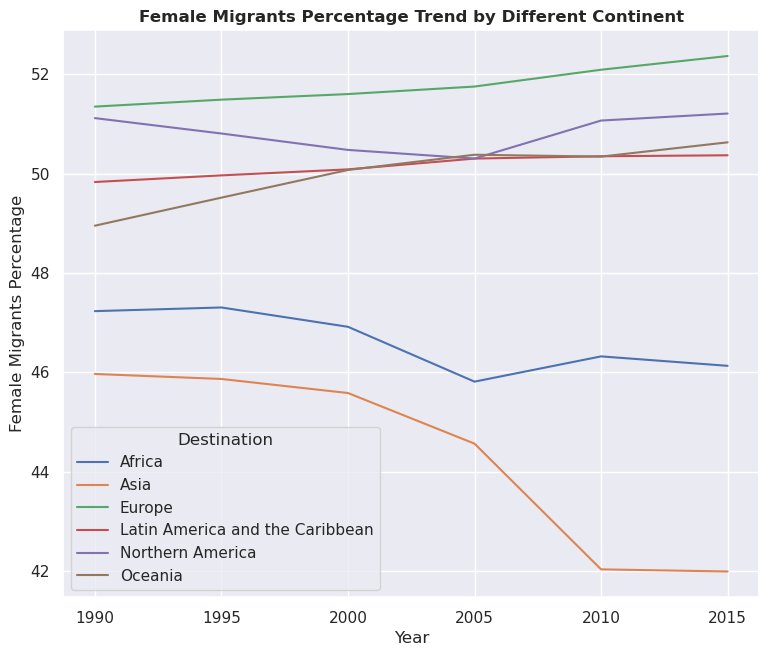

In [37]:
# Obtain 6 continents 
table4_major = table4.loc[(table4['Destination'] == "Africa")|
                          (table4['Destination'] == "Asia")|
                          (table4['Destination'] == "Europe")|
                          (table4['Destination'] == "Latin America and the Caribbean")|
                          (table4['Destination'] == "Northern America") |
                          (table4['Destination'] == "Oceania")] 
sns.set(font_scale=1)
# Create a line plot for female persentage by continents 
fig, ax = plt.subplots(figsize=(8,7))
sns.lineplot(data=table4_major, x="Year", y="Female Migrants Percentage", hue="Destination")
plt.title("Female Migrants Percentage Trend by Different Continent",fontsize=12,fontweight="bold") 

## Lineplot 5: Refugee Migrants Percentage Trend by Different Continent

Text(0.5, 1.0, 'Refugee Migrants Percentage Trend by Different Continent')

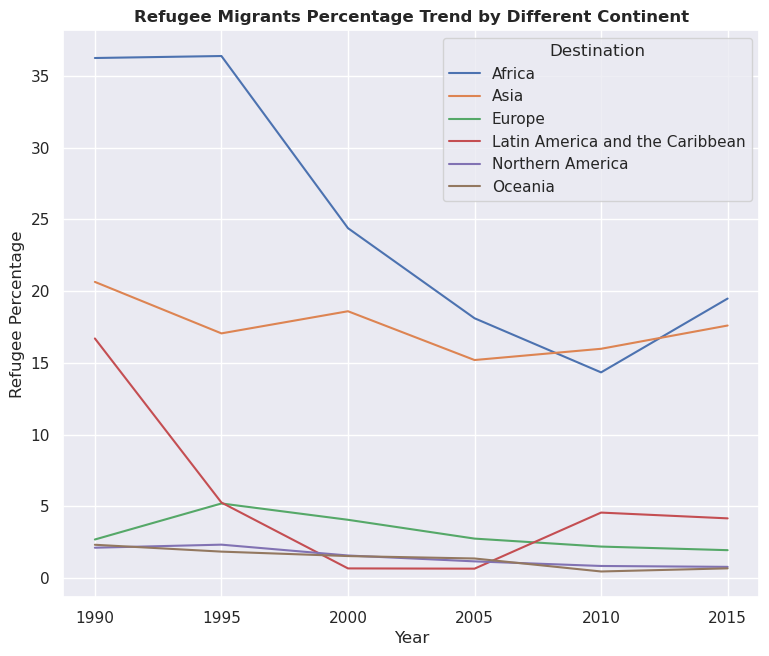

In [38]:
# Lineplot for Refugee Migrants Percentage Trend by Different Continent
fig, ax = plt.subplots(figsize=(8,7))
sns.lineplot(data=table4_major, x="Year", y="Refugee Percentage", hue="Destination")
plt.title("Refugee Migrants Percentage Trend by Different Continent",fontsize=12,fontweight="bold") 

## Boxplot 4: Female Migrants Percentage Distribution in Each Continent

Text(0.5, 1.0, 'Female Migrants Percentage Distribution in Each Continent')

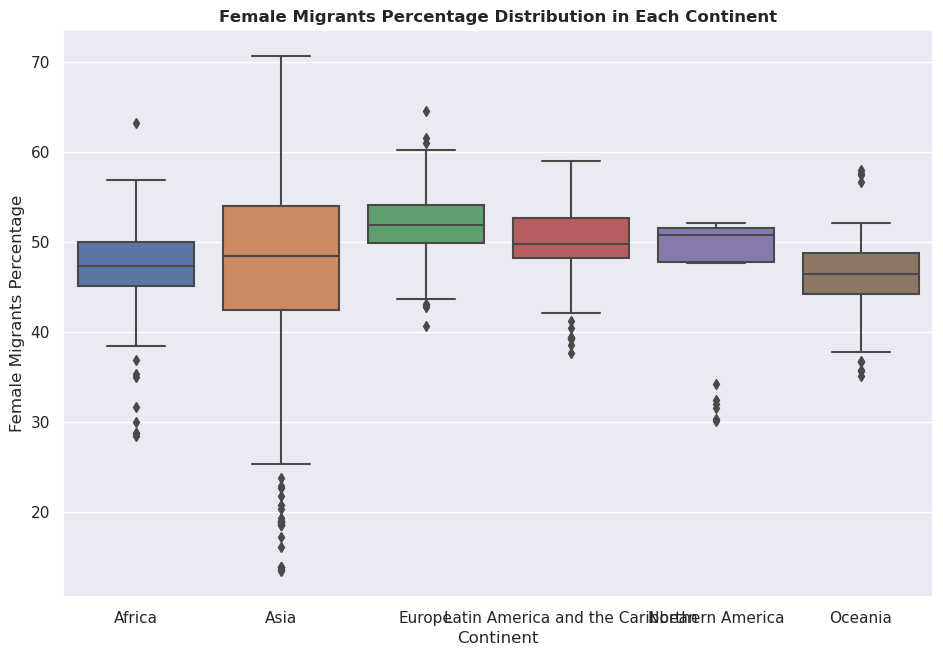

In [39]:
# Add a continent column to the table 4, remove major areas and only left individual countries
table4_continent = continent_col(table4) 
table4_continent = table4_continent[(table4_continent['Country Code'] < 900)] 
table4_continent = table4_continent.drop(table4_continent[table4_continent['Continent'] == 'Others'].index) 

# Create boxplots for female migrants percentage distribution in each continent
fig, ax = plt.subplots(figsize=(10,7))
sns.boxplot(
    data=table4_continent,
    x="Continent", y="Female Migrants Percentage")    
plt.title("Female Migrants Percentage Distribution in Each Continent",fontsize=12,fontweight="bold")

## Boxplot 4: Female Migrants Percentage Distribution in Each Continent by Year

Text(0.5, 1.0, 'Female Migrants Percentage Distribution in Each Continent by Year')

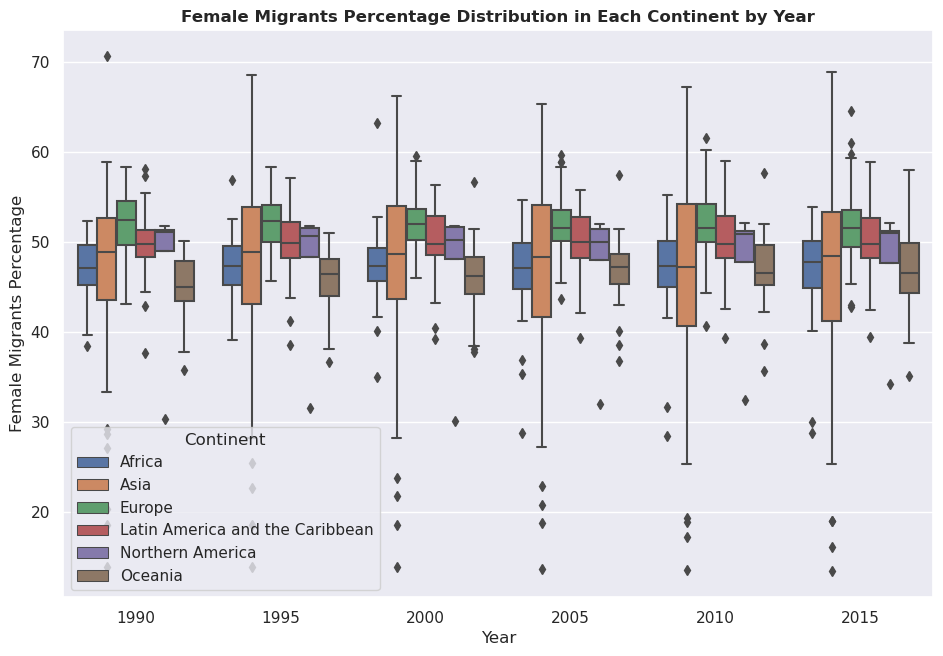

In [40]:
# Create boxplots for female migrants percentage distribution in each continent in each year
fig, ax = plt.subplots(figsize=(10,7))
sns.boxplot(
    data=table4_continent, hue = 'Continent',
    x="Year", y="Female Migrants Percentage")    
plt.title("Female Migrants Percentage Distribution in Each Continent by Year",fontsize=12,fontweight="bold") 

## Barplot 5: Average Refugee Percentage of Population by Continents

Text(0.5, 1.0, 'Refugee Percentage of Population by Continents')

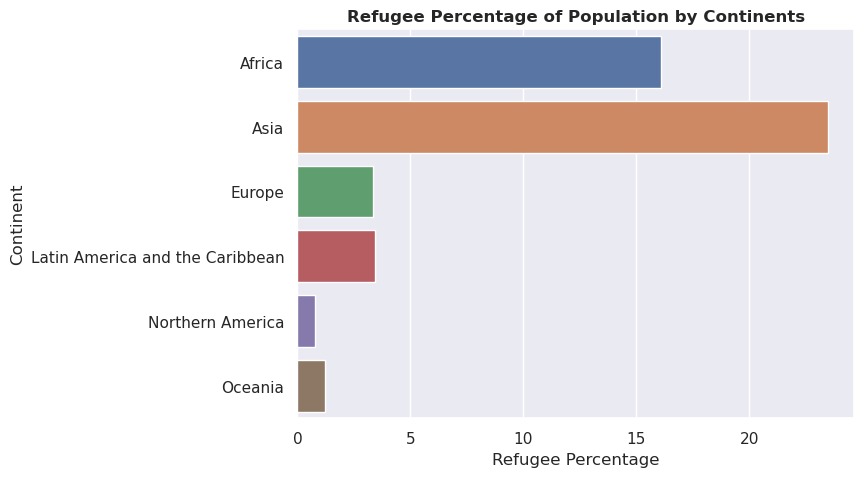

In [41]:
# create a bar plot for Refugee Percentage of Population by Continents, average on years
sns.barplot(x = 'Refugee Percentage', y = 'Continent', data = table4_continent,
            label = 'Total Population (tens)', edgecolor = 'w',ci=None)
plt.title("Refugee Percentage of Population by Continents",fontsize=12,fontweight="bold") 

## Barplot 6: Barplot for Refugees Percentage of International Migrant Stock by Continent and Year

Text(0.5, 0.98, 'Barplot for Refugees Percentage of International Migrant Stock by Continent and Year')

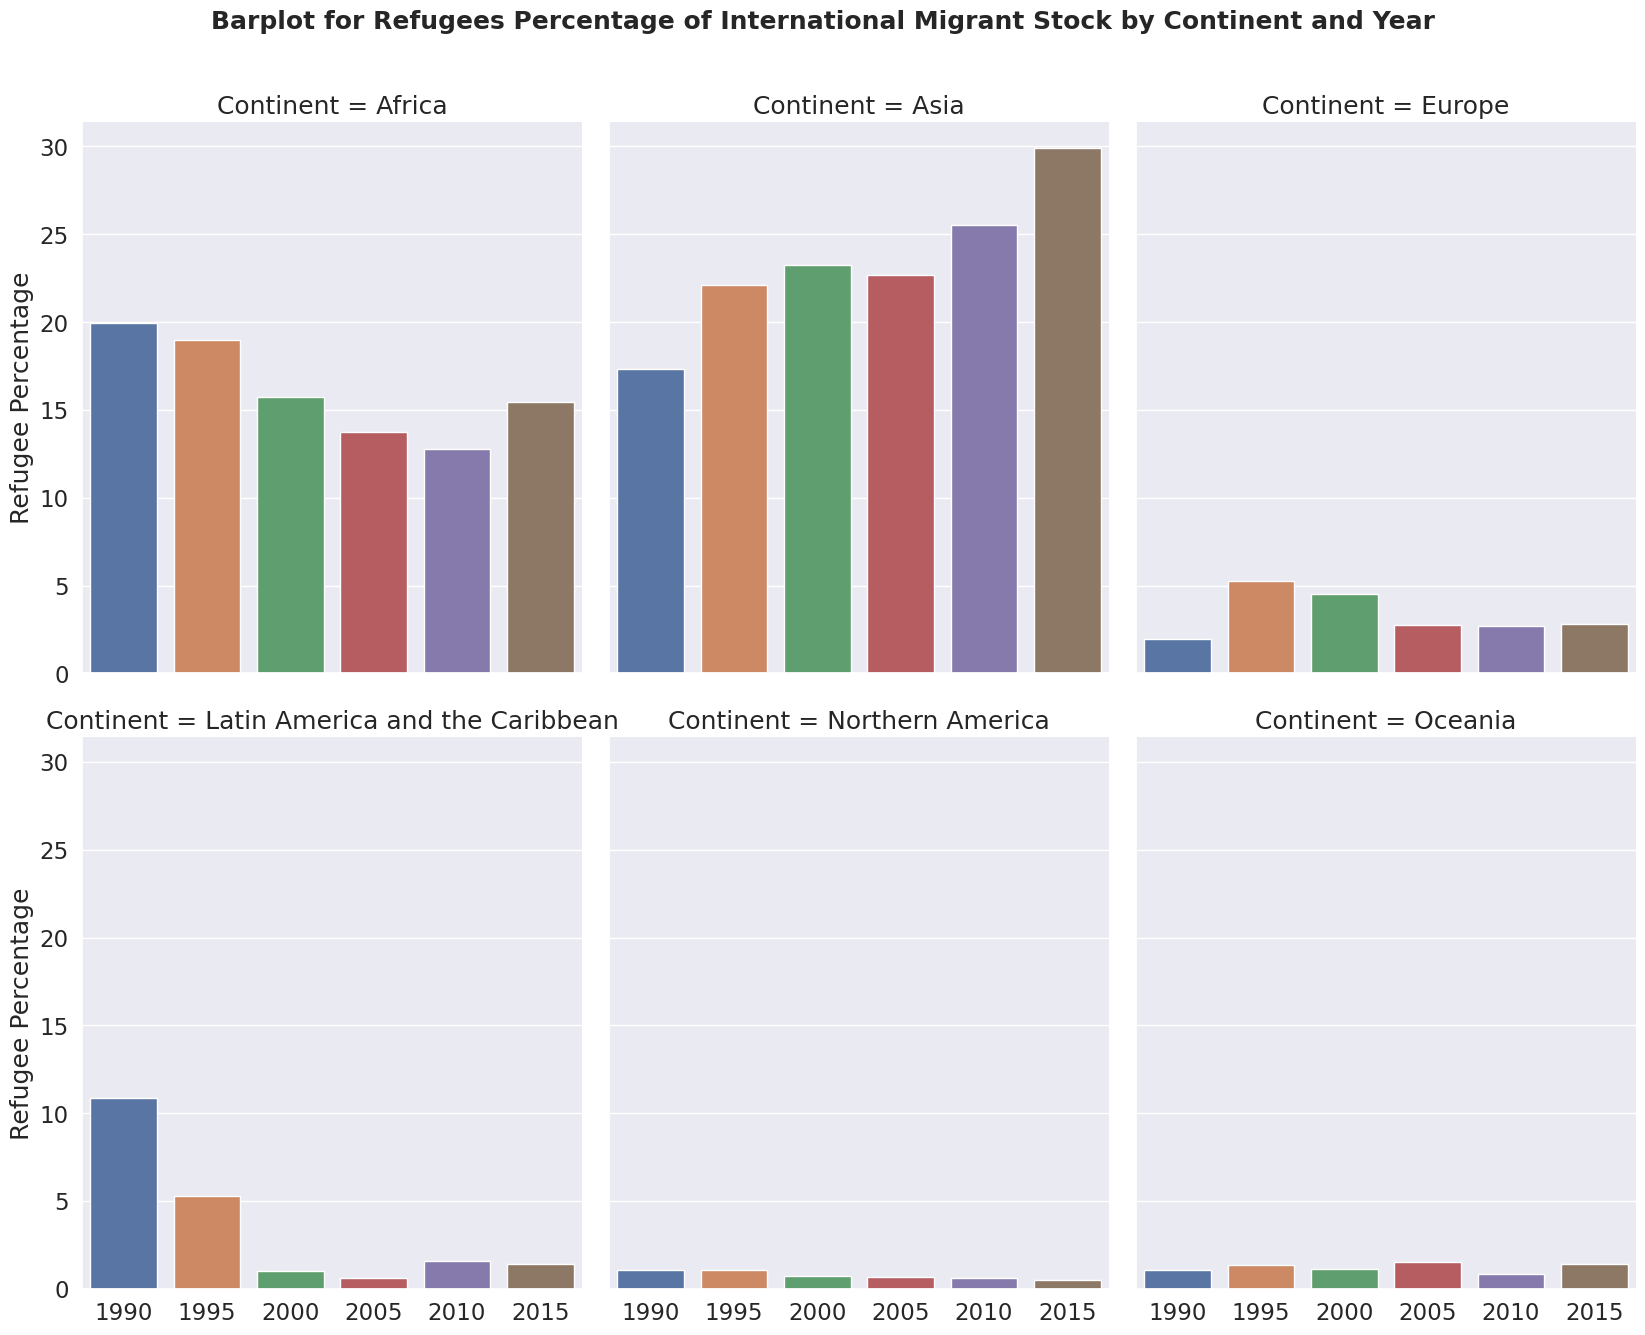

In [42]:
sns.set(font_scale=1.5)
# Plot each year's bar plot
g = sns.catplot(x = "Year", y = "Refugee Percentage", 
            col = "Continent", 
            data=table4_continent, kind="bar",height=7,
            col_wrap=3, ci = None, legend=False, aspect=0.8)  
g.set_axis_labels("", "Refugee Percentage") # y lab label
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Barplot for Refugees Percentage of International Migrant Stock by Continent and Year',
               fontsize=18,fontweight="bold")

# Table 5

In [43]:
table5.head()

,Order,Destination,Country Code,Year,Both Sexes,Female,Male,Refugees
0,1,WORLD,900,1990-1995,1.051865,1.104667,1.000922,-2.123497
1,1,WORLD,900,1995-2000,1.428058,1.405044,1.450294,-3.837069
2,1,WORLD,900,2000-2005,2.042124,1.928080,2.151575,-5.557223
3,1,WORLD,900,2005-2010,2.954160,2.737012,3.159228,-0.025089
4,1,WORLD,900,2010-2015,1.890991,1.867837,1.912603,2.947267


In [44]:
# Obtain the 6 major continents from table 5 
table5_major = table5.loc[(table5['Destination'] == "Africa")|
                          (table5['Destination'] == "Asia")|
                          (table5['Destination'] == "Europe")|
                          (table5['Destination'] == "Latin America and the Caribbean")|
                          (table5['Destination'] == "Northern America") |
                          (table5['Destination'] == "Oceania")] 

## Scatterplot 1: Annual Rate of Change of The Migrant Stock (Both Sexes) by Continent and Year

Text(0.5, 0.98, 'Scatterplot for Annual Rate of Change of The Migrant Stock (Both Sexes) by Continent and Year')

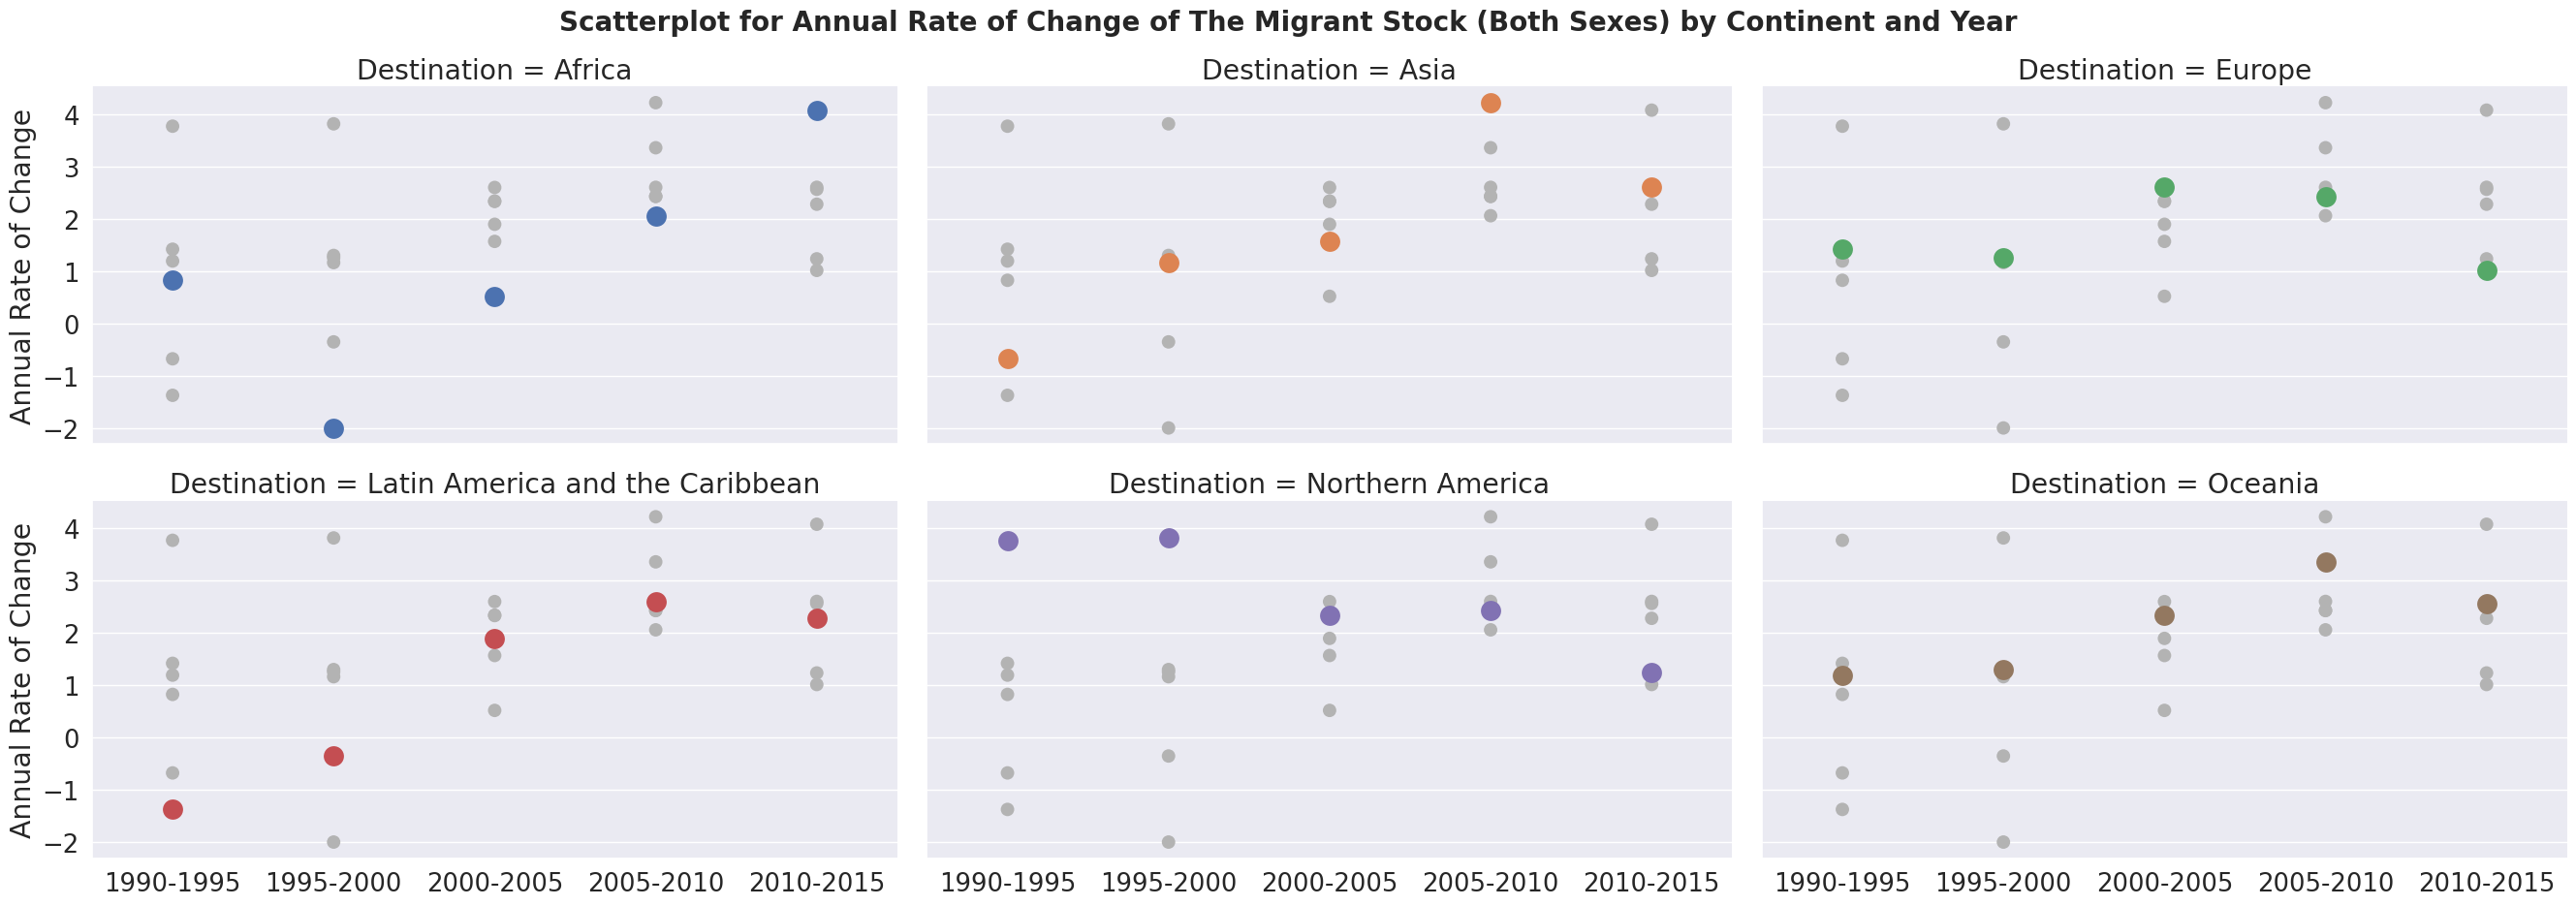

In [45]:
sns.set_theme(style="dark") 
sns.set(font_scale=1.7)
# scatterplot for Annual Rate of Change of The Migrant Stock (Both Sexes) by Continent and Year
g = sns.catplot(
    data=table5_major,jitter=False,
    x="Year", y="Both Sexes", col= "Destination", hue="Destination",
    aspect=1.8,col_wrap=3, legend=False,palette="deep",s=15,zorder=5)

# Iterate over each subplot to customize further
for Destination, ax in g.axes_dict.items():  
    # Plot every destination in the background 
    sns.stripplot(data=table5_major, x="Year", y="Both Sexes",color=".7",ax=ax,s=10,jitter=False)

g.set_axis_labels("", "Annual Rate of Change")  # y label
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Scatterplot for Annual Rate of Change of The Migrant Stock (Both Sexes) by Continent and Year',
               fontsize=20,fontweight="bold")

## Scatterplot 2: Annual Rate of Change of The Migrant Stock (Refugees) by Continent and Year

In [ ]:
sns.set_theme(style="dark") 
sns.set(font_scale=1.7)
# scatterplot for Annual Rate of Change of The Migrant Stock (Refugees) by Continent and Year
g = sns.catplot(
    data=table5_major,jitter=False,
    x="Year", y="Refugees", col= "Destination", hue="Destination",
    aspect=1.8,col_wrap=3, legend=False,palette="deep",s=15,zorder=5)

# Iterate over each subplot to customize further
for Destination, ax in g.axes_dict.items():  
    # Plot every Destination's plot in the background 
    sns.stripplot(data=table5_major, x="Year", y="Refugees",color=".7",ax=ax,s=10,jitter=False)

g.set_axis_labels("", "Annual Rate of Change") 
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Scatterplot for Annual Rate of Change of The Migrant Stock (Refugees) by Continent and Year',
               fontsize=20,fontweight="bold")

## Scatterplot 3: Annual Rate of Change of The Migrant Stock (Female) by Continent and Year

In [ ]:
sns.set_theme(style="dark") 
sns.set(font_scale=1.7)
# scatterplot for Annual Rate of Change of The Migrant Stock (female) by Continent and Year
g = sns.catplot(
    data=table5_major,jitter=False,
    x="Year", y="Female", col= "Destination", hue="Destination",
    aspect=1.8,col_wrap=3, legend=False,palette="deep",s=15,zorder=5)


# Iterate over each subplot to customize further
for Destination, ax in g.axes_dict.items():  
    # Plot every Destination's plot in the background 
    sns.stripplot(data=table5_major, x="Year", y="Female",color=".7",ax=ax,jitter=False,s=10)

g.set_axis_labels("", "Annual Rate of Change") 
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Stripplot for Annual Rate of Change of The Migrant Stock (Female) by Continent and Year',
               fontsize=20,fontweight="bold")

# Table 6

In [ ]:
table6

## Lineplot 6: Refugee Migrants Trend by Continent and Year

In [ ]:
# Add a continent column to the table 6, remove major areas and only left individual countries
table6_continent = continent_col(table6) 
table6_continent = table6_continent[(table6_continent['Country Code'] < 900)] 
table6_continent = table6_continent.drop(table6_continent[table6_continent['Continent'] == 'Others'].index) 

sns.set(font_scale=1)
# Plot line plot for continents, where the values cross continents are averaged
fig, ax = plt.subplots(figsize=(6,7))
sns.lineplot(data=table6_continent, x="Year", y="Refugee Stock", ci=False, hue="Continent") 
plt.title("Lineplot for Refugees Migrant Stock by Continent and Year",fontsize=12,fontweight="bold")